In [1]:
!pip install kaggle

In [2]:
import pandas as pd


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhiljar","key":"14ab3c31c17d66839d89a4d5e6ad751c"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




In [5]:
!kaggle datasets download -d lemonx/babd13

Dataset URL: https://www.kaggle.com/datasets/lemonx/babd13
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 5.30G/5.33G [01:11<00:00, 132MB/s]
100% 5.33G/5.33G [01:12<00:00, 79.4MB/s]


In [6]:
!unzip babd13.zip

Streaming output truncated to the last 5000 lines.
  inflating: 600000-605999/600000-605999/605889/58_36.json  
  inflating: 600000-605999/600000-605999/605889/58_37.json  
  inflating: 600000-605999/600000-605999/605889/58_38.json  
  inflating: 600000-605999/600000-605999/605889/58_39.json  
  inflating: 600000-605999/600000-605999/605889/58_4.json  
  inflating: 600000-605999/600000-605999/605889/58_40.json  
  inflating: 600000-605999/600000-605999/605889/58_41.json  
  inflating: 600000-605999/600000-605999/605889/58_42.json  
  inflating: 600000-605999/600000-605999/605889/58_43.json  
  inflating: 600000-605999/600000-605999/605889/58_44.json  
  inflating: 600000-605999/600000-605999/605889/58_45.json  
  inflating: 600000-605999/600000-605999/605889/58_46.json  
  inflating: 600000-605999/600000-605999/605889/58_47.json  
  inflating: 600000-605999/600000-605999/605889/58_48.json  
  inflating: 600000-605999/600000-605999/605889/58_49.json  
  inflating: 600000-605999/600000-6

In [7]:
import os
import csv
import json

# Function to read CSV file and extract accounts
def extract_accounts_from_csv(csv_file):
    accounts = set()
    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            accounts.add(row['account'])
    return accounts

# Function to extract transaction details from JSON file
def extract_transactions_from_json(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
        return data['data']['list']

# Function to recursively search for JSON files in a directory
def find_json_files(directory):
    json_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    return json_files

# Main function to check for addresses in both files and save into CSV
def fetch_details_and_save_to_csv(csv_file, json_directory, output_csv_file):
    accounts_in_csv = extract_accounts_from_csv(csv_file)
    json_files = find_json_files(json_directory)

    with open(output_csv_file, 'w', newline='') as csvfile:
        fieldnames = ['Transaction Hash', 'Input Addresses', 'Output Addresses']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for json_file in json_files:
            transactions = extract_transactions_from_json(json_file)
            for transaction in transactions:
                input_addresses = set()
                output_addresses = set()
                for inp in transaction['inputs']:
                    input_addresses.update(inp['prev_addresses'])
                for out in transaction['outputs']:
                    output_addresses.update(out['addresses'])

                # Check if at least one input and output address is present in the CSV file
                if input_addresses.intersection(accounts_in_csv) and output_addresses.intersection(accounts_in_csv):
                    # Write the details into the CSV file
                    writer.writerow({
                        'Transaction Hash': transaction['hash'],
                        'Input Addresses': ', '.join(input_addresses),
                        'Output Addresses': ', '.join(output_addresses)
                    })

# Example usage
fetch_details_and_save_to_csv('BABD-13.csv', '600000-605999', 'output_transactions.csv')
print('file created!')


file created!


In [8]:
import csv
import networkx as nx

# Function to read addresses from another CSV file
def read_addresses_from_csv(csv_file):
    addresses = set()
    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            addresses.add(row['account'])
    return addresses

# Function to read output_transactions.csv and create a graph
def create_graph_from_csv(csv_file, addresses_csv):
    addresses = read_addresses_from_csv(addresses_csv)
    G = nx.DiGraph()
    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            input_addresses = row['Input Addresses'].split(', ')
            output_addresses = row['Output Addresses'].split(', ')
            for addr in input_addresses + output_addresses:
                if addr in addresses:
                    if not G.has_node(addr):
                        G.add_node(addr)
            for input_addr in input_addresses:
                for output_addr in output_addresses:
                    if input_addr in G and output_addr in G:  # Check if both input and output addresses are present in the graph
                        G.add_edge(input_addr, output_addr)
    return G

# Example usage
G = create_graph_from_csv('output_transactions.csv', 'BABD-13.csv')
print(G)





DiGraph with 14928 nodes and 25798 edges


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

Subgraph 1 nodes: ['17jCC6JLKUYYRrjW9LwkSFtiFLSwgNbHhX', '3ABE4BZkwv2ubYYGhUtNxL57gMwenUEuNW', '3DKnbPYnSyBsdVMiUvPZ975LM8gUdXQtaS', '3PWdBX9SvDFwCanJPFqVuzuG1NtJLbCe7R', '3NrGKZeUrSokt61RitjHWpWrN4UAJo9wwT', '3CUerCz2GzBQ11M6nisuk4do25urJrBR2t', '3P7gRicLVkYjEQasR7yjto49fbmt7Ny2KE', '37bNSi2bdY6gMRVciQnx8nB2VzZ3MxW5md', '337wTxesZpFiZfaDwJsAnbugyUFHf9Lcn2', '3JhPHqboEDvtLZmf5JVKsHcUnkA2jewsqk', '1HAMLEmJLutaEXeHJRAASqryxXCawDzFw1', '1GAr91Su9wVd1Y3mbHMiVKEvCdQPXAbzRk', '3Gyhov96jtnWVR71dCMwUwZDhyS1TbVqWY', '3Au74DHLr1NKNoRNn2xENSdF9ZzpMxhv51', '32PQnhRgSVQUgSGLYeyNCx8HeHSTkeYXtK', '3Bsu6nsnNodNg2LNxTaCwK8UfPLFBHfy4Q', '3GCXgFJSdne52eLNgG5yr67FNXtidnsiSf', '3NxuE6smsBvorbzLz2qVoboW4w9BtPmWqu', '33ghvgrHt5TroTkjWaP641JM9Y1WZYc7LS', '3GnqydSAeskDnuhKZ6LpSzVRQEbLuwrqgE', '37sd6CZeABFEr1dZQCeQJ2qeeMmQj1KvJk', '343iW67xT2UrG8K7LWLUQNnSieieHh9vwj', '3Qg6fRqQZuH8e2RRwcf6cMHrtkyEBEpfUX', '39YKjh4HyDi1EhJiLXB8LNR69b6H6Pdc79', '36ap2z35BcitcAAtdtKvtaap6tCH7uuhud', '1KaNQ89dX5DMbAHWcz3gb88EpFJ41c

In [ ]:
total_nodes = len(G.nodes)
subgraph1_count = int(0.8 * total_nodes)
subgraph2_count = int(0.1 * total_nodes)
subgraph3_count = int(0.1 * total_nodes)

import random
nodes_list = list(G.nodes)
random.shuffle(nodes_list)

subgraph1_nodes = nodes_list[:subgraph1_count]
subgraph2_nodes = nodes_list[subgraph1_count:subgraph1_count+subgraph2_count]
subgraph3_nodes = nodes_list[subgraph1_count+subgraph2_count:]

subgraph1 = G.subgraph(subgraph1_nodes)
subgraph2 = G.subgraph(subgraph2_nodes)
subgraph3 = G.subgraph(subgraph3_nodes)

print("Subgraph 1 nodes:", subgraph1.nodes())
print("Subgraph 2 nodes:", subgraph2.nodes())
print("Subgraph 3 nodes:", subgraph3.nodes())

Subgraph 1 nodes: ['3HRZjedwF2AJejNTtgznWnas4E6froNP5r', '1KaNQ89dX5DMbAHWcz3gb88EpFJ41cCwZG', '17jCC6JLKUYYRrjW9LwkSFtiFLSwgNbHhX', '19XZRWfaE2TDxn58aYTgc56d2pEA3jP9hf', '195jtjPMi99EmXoGEaVGn9nYAdqGX1z9Lm', '1NKQ8Kh58xgHH6QU2JkJowgNiz5dEhgLJH', '3EENzQdQS3BvvnkeJjC5uVwUKFuTczpnok', '3ABE4BZkwv2ubYYGhUtNxL57gMwenUEuNW', '18pGMH3vNR9Zpu8jvx5f7fE3keRgU6vGiT', '1Ndxpxx3nzDgWmudFgnNJUUuNKGhiBytA', '1FAsuQNgkiMPfUegpYL4yiH9MLUAKyqR1C', '1FHkWebVsb44jtmcSVPih37dmfiQgji1wB', '1AMAv3YHBHK2sZbojkvHRb3QAVjrUF2K3Y', '1F1FZJT3KwN3JeWkduupY5mWwyKtRayqa9', '1FxJybazYShv7ma9ZAszyBCotGRVpgpftC', '1NPLHLVv1bcBdEM8hBBMCZXeopiGGGqfz5', '19cLcxhJEUEZa6JNQ8HbKtsZFG8HQHTnn9', '1A4q32jUCKzgsxkjnSEQk13MeQ16s7sHUs', '18t1482ETrMDQn89tktDAEVdH2vEyAN6Qu', '18i9zpDoEUKXdJbxSFsEumbYWfk4zmcjqX', '175xKXTfcLiXgX7XqxLCaskBzW4Qs3nWAM', '19S7XmdRnH4b9sw4QSi6xX7N4qt92YdecV', '1HGggmad966UgJr5UrCNxRjLaVLf4yvg74', '15yVqwoDLsHiKiDQh8GcxzyxHrK1XbH1Fm', '19GyWBEsS9EGGXDCPVVzJGbewiyMDYhVNw', 'bc1qk9exr66qnyg8yjgtuz2ymc6z683

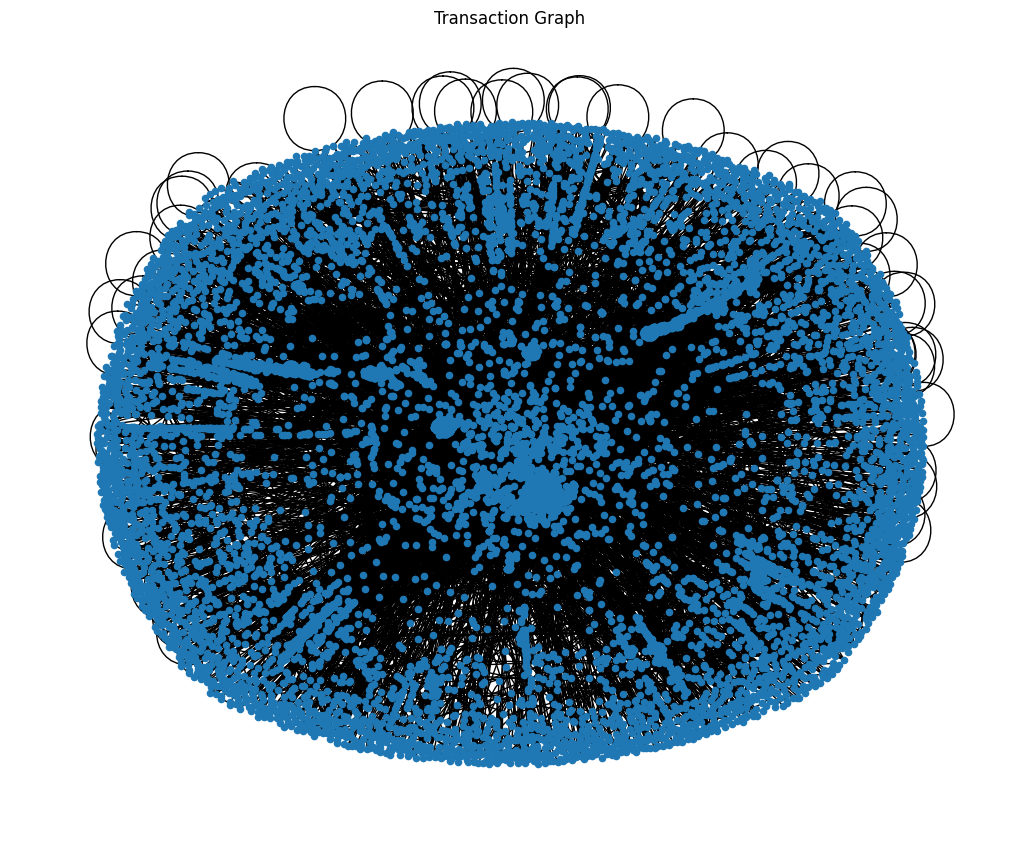

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming you have your graph object 'G'

# Plot the graph with default layout and coloring
plt.figure(figsize=(10, 8))
nx.draw_spring(subgraph1, node_size=20, arrows=False)  # Spring layout, adjust node size as needed
plt.title('Transaction Graph')
plt.show()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Edge Indices shape: torch.Size([2, 11826])


In [ ]:
import torch

edges = list(subgraph1.edges())
source_nodes = [edge[0] for edge in edges]
target_nodes = [edge[1] for edge in edges]

node_id_mapping = {node_id: idx for idx, node_id in enumerate(subgraph1.nodes)}

source_nodes = [node_id_mapping[node] for node in source_nodes]
target_nodes = [node_id_mapping[node] for node in target_nodes]

source_nodes = torch.tensor(source_nodes, dtype=torch.long)
target_nodes = torch.tensor(target_nodes, dtype=torch.long)

# Stack as edge_index
edge_index_train = torch.stack((source_nodes, target_nodes))

print(f"Edge Indices shape: {edge_index_train.shape}")
torch.save(edge_index_train, "edge_index.pt")
print("Edge indices saved successfully!")

Edge Indices shape: torch.Size([2, 16974])
Edge indices saved successfully!


In [ ]:
import torch

edges = list(subgraph2.edges())
source_nodes = [edge[0] for edge in edges]
target_nodes = [edge[1] for edge in edges]

node_id_mapping = {node_id: idx for idx, node_id in enumerate(subgraph2.nodes)}

source_nodes = [node_id_mapping[node] for node in source_nodes]
target_nodes = [node_id_mapping[node] for node in target_nodes]

source_nodes = torch.tensor(source_nodes, dtype=torch.long)
target_nodes = torch.tensor(target_nodes, dtype=torch.long)

# Stack as edge_index
edge_index_test = torch.stack((source_nodes, target_nodes))

print(f"Edge Indices shape: {edge_index_test.shape}")
torch.save(edge_index_test, "edge_index_test.pt")
print("Edge indices saved successfully!")

Edge Indices shape: torch.Size([2, 233])
Edge indices saved successfully!


In [ ]:
import torch

edges = list(subgraph3.edges())
source_nodes = [edge[0] for edge in edges]
target_nodes = [edge[1] for edge in edges]

node_id_mapping = {node_id: idx for idx, node_id in enumerate(subgraph3.nodes)}

source_nodes = [node_id_mapping[node] for node in source_nodes]
target_nodes = [node_id_mapping[node] for node in target_nodes]

source_nodes = torch.tensor(source_nodes, dtype=torch.long)
target_nodes = torch.tensor(target_nodes, dtype=torch.long)

# Stack as edge_index
edge_index_val = torch.stack((source_nodes, target_nodes))

print(f"Edge Indices shape: {edge_index_val.shape}")
torch.save(edge_index_val, "edge_index_val.pt")
print("Edge indices saved successfully!")

Edge Indices shape: torch.Size([2, 301])
Edge indices saved successfully!


In [ ]:
import networkx as nx
import numpy as np

# Create an adjacency matrix
adjacency_matrix_train = nx.to_numpy_array(subgraph1)

# Convert NaN values (nonexistent edges) to 0
adjacency_matrix_train = np.nan_to_num(adjacency_matrix_train)

# Print the adjacency matrix
print("Adjacency Matrix:")
print(adjacency_matrix_train)
print(adjacency_matrix_train.shape)

# Save the adjacency matrix to a file
np.savetxt('adjacency_matrix_train.txt', adjacency_matrix_train, fmt='%d')

# Create an adjacency matrix
adjacency_matrix_test = nx.to_numpy_array(subgraph2)

# Convert NaN values (nonexistent edges) to 0
adjacency_matrix_test = np.nan_to_num(adjacency_matrix_test)

# Print the adjacency matrix
print("Adjacency Matrix:")
print(adjacency_matrix_test)
print(adjacency_matrix_test.shape)

# Save the adjacency matrix to a file
np.savetxt('adjacency_matrix_test.txt', adjacency_matrix_test, fmt='%d')

# Create an adjacency matrix
adjacency_matrix_val = nx.to_numpy_array(subgraph3)

# Convert NaN values (nonexistent edges) to 0
adjacency_matrix_val = np.nan_to_num(adjacency_matrix_val)

# Print the adjacency matrix
print("Adjacency Matrix:")
print(adjacency_matrix_val)
print(adjacency_matrix_val.shape)

# Save the adjacency matrix to a file
np.savetxt('adjacency_matrix_val.txt', adjacency_matrix_val, fmt='%d')

Adjacency Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
(11942, 11942)
Adjacency Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1492, 1492)
Adjacency Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1494, 1494)


In [ ]:
graph_accounts = set(subgraph1.nodes())
babd_csv = "BABD-13.csv"
filtered_babd = []


with open(babd_csv, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['account'] in graph_accounts:
            filtered_babd.append(row)





# Save filtered rows to a CSV (optional):
with open('train.csv', 'w', newline='') as outfile:
    fieldnames = filtered_babd[0].keys()  # Get fieldnames from first row
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_babd)





print('files created')

files created


In [ ]:
test_graph = set(subgraph2.nodes())
babd_csv = "BABD-13.csv"
test = []
with open(babd_csv, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['account'] in test_graph:
            test.append(row)
with open('test.csv', 'w', newline='') as outfile:
    test_fieldnames = test[0].keys()  # Get fieldnames from first row
    writer = csv.DictWriter(outfile, fieldnames=test_fieldnames)
    writer.writeheader()
    writer.writerows(test)

print('files created')

files created


In [ ]:
val_graph = set(subgraph3.nodes())
babd_csv = "BABD-13.csv"
val = []
with open(babd_csv, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['account'] in val_graph:
            val.append(row)
with open('val.csv', 'w', newline='') as outfile:
    val_fieldnames = val[0].keys()  # Get fieldnames from first row
    writer = csv.DictWriter(outfile, fieldnames=val_fieldnames)
    writer.writeheader()
    writer.writerows(val)

print('files created')

files created


In [ ]:
#for sorting



nodes1 = list(subgraph1.nodes())


# Specify the node identifier column in your CSV file
node_identifier_column = "account"

# Open the CSV file for reading and write to a new sorted CSV file
with open('train.csv', 'r') as infile, open('train_data.csv', 'w', newline='') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()  # Write the header row

    # Convert node order to dictionary for efficient lookup
    node_to_index = {node: i for i, node in enumerate(nodes1)}

    # Sort rows based on their node's index in the adjacency matrix
    sorted_rows = sorted(reader, key=lambda row: node_to_index[row[node_identifier_column]])
    writer.writerows(sorted_rows)

print('file sorted')


file sorted


In [ ]:

nodes2 = list(subgraph2.nodes())


# Specify the node identifier column in your CSV file
node_identifier_column = "account"

# Open the CSV file for reading and write to a new sorted CSV file
with open('test.csv', 'r') as infile, open('test_data.csv', 'w', newline='') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()  # Write the header row

    # Convert node order to dictionary for efficient lookup
    node_to_index = {node: i for i, node in enumerate(nodes2)}

    # Sort rows based on their node's index in the adjacency matrix
    sorted_rows = sorted(reader, key=lambda row: node_to_index[row[node_identifier_column]])
    writer.writerows(sorted_rows)

print('file sorted')

file sorted


In [ ]:

nodes3 = list(subgraph3.nodes())


# Specify the node identifier column in your CSV file
node_identifier_column = "account"

# Open the CSV file for reading and write to a new sorted CSV file
with open('val.csv', 'r') as infile, open('val_data.csv', 'w', newline='') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()  # Write the header row

    # Convert node order to dictionary for efficient lookup
    node_to_index = {node: i for i, node in enumerate(nodes3)}

    # Sort rows based on their node's index in the adjacency matrix
    sorted_rows = sorted(reader, key=lambda row: node_to_index[row[node_identifier_column]])
    writer.writerows(sorted_rows)

print('file sorted')

file sorted


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv("train_data.csv")
df2 = pd.read_csv("test_data.csv")
df3 = pd.read_csv("val_data.csv")
# Drop duplicates based on the 'account_number' column
df1 = df1.drop_duplicates(subset=['account'])
df2 = df2.drop_duplicates(subset=['account'])
df3 = df3.drop_duplicates(subset=['account'])

# Print the number of remaining rows after removing duplicates
n_rows_remaining = df1.shape[0]
r1 = df2.shape[0]
r2 = df3.shape[0]
print(f"Number of rows remaining after removing duplicates: {n_rows_remaining}")
print(f"Number of rows remaining after removing duplicates: {r1}")
print(f"Number of rows remaining after removing duplicates: {r2}")

df1.to_csv("train_filtered.csv", index=False)
df2.to_csv("test_filtered.csv", index=False)
df3.to_csv("val_filtered.csv", index=False)


# Optionally, print the modified DataFrame
# print(df)


Number of rows remaining after removing duplicates: 11942
Number of rows remaining after removing duplicates: 1492
Number of rows remaining after removing duplicates: 1494


In [ ]:
df = pd.read_csv('train_filtered.csv')
features = df.columns[2:-1]
feature_matrix_train = df[features].values

# Print the feature matrix
print("Feature Matrix:")
print(feature_matrix_train.shape)


# Save the feature matrix to a file (if needed)
np.savetxt('feature_matrix_train.txt', feature_matrix_train, fmt='%.6f')

Feature Matrix:
(11942, 148)


In [ ]:
df = pd.read_csv('test_filtered.csv')
features = df.columns[2:-1]
feature_matrix_test = df[features].values

# Print the feature matrix
print("Feature Matrix:")
print(feature_matrix_test.shape)


# Save the feature matrix to a file (if needed)
np.savetxt('feature_matrix_test.txt', feature_matrix_test, fmt='%.6f')

Feature Matrix:
(1492, 148)


In [ ]:
df = pd.read_csv('val_filtered.csv')
features = df.columns[2:-1]
feature_matrix_val = df[features].values

# Print the feature matrix
print("Feature Matrix:")
print(feature_matrix_val.shape)


# Save the feature matrix to a file (if needed)
np.savetxt('feature_matrix_val.txt', feature_matrix_val, fmt='%.6f')

Feature Matrix:
(1494, 148)


In [9]:
total_nodes = len(G.nodes)
subgraph1_count = int(0.9 * total_nodes)
subgraph2_count = int(0.05 * total_nodes)
subgraph3_count = int(0.05 * total_nodes)

import random
nodes_list = list(G.nodes)
random.shuffle(nodes_list)

subgraph1_nodes = nodes_list[:subgraph1_count]
subgraph2_nodes = nodes_list[subgraph1_count:subgraph1_count+subgraph2_count]
subgraph3_nodes = nodes_list[subgraph1_count+subgraph2_count:]

subgraph1_1 = G.subgraph(subgraph1_nodes)
subgraph2_1 = G.subgraph(subgraph2_nodes)
subgraph3_1 = G.subgraph(subgraph3_nodes)

print("Subgraph 1 nodes:", subgraph1_1.nodes())
print("Subgraph 2 nodes:", subgraph2_1.nodes())
print("Subgraph 3 nodes:", subgraph3_1.nodes())

Subgraph 1 nodes: ['3PRu1LQ6fhHbUEop5vWFFYGAixi9XWhSsF', '3MFbPkv7PEYtt7BFCsVvceqenMhHFZvuFB', '3GfpzpWVRkZk84eZQepXrf13ErWCiXhJHF', '175xKXTfcLiXgX7XqxLCaskBzW4Qs3nWAM', '3Q3fELB57fJAd9kUJcUkMZfxm7ez55fN8p', '3ABE4BZkwv2ubYYGhUtNxL57gMwenUEuNW', '3HRZjedwF2AJejNTtgznWnas4E6froNP5r', '3EENzQdQS3BvvnkeJjC5uVwUKFuTczpnok', '1JB6jJc5DyRwLrRruHPPznQTzqtejb1Faw', '18i9zpDoEUKXdJbxSFsEumbYWfk4zmcjqX', '1FxJybazYShv7ma9ZAszyBCotGRVpgpftC', '18pGMH3vNR9Zpu8jvx5f7fE3keRgU6vGiT', '1Ndxpxx3nzDgWmudFgnNJUUuNKGhiBytA', '1A4q32jUCKzgsxkjnSEQk13MeQ16s7sHUs', '1F1FZJT3KwN3JeWkduupY5mWwyKtRayqa9', '1FAsuQNgkiMPfUegpYL4yiH9MLUAKyqR1C', '1FHkWebVsb44jtmcSVPih37dmfiQgji1wB', '19cLcxhJEUEZa6JNQ8HbKtsZFG8HQHTnn9', '1Fhv9n1tDkt3B4ntCuCmeGwdhMTxWTF3sc', '1AMAv3YHBHK2sZbojkvHRb3QAVjrUF2K3Y', '1NU1sFJQm8ZZPRVzUoamswCWVAFmHM45gL', '18t1482ETrMDQn89tktDAEVdH2vEyAN6Qu', '1JLy5dW2FDiJGHBpws4ydbu1TubS1n3EEw', '17jCC6JLKUYYRrjW9LwkSFtiFLSwgNbHhX', '3E5NsFYg9H64TSB9MroJCCZJG7dJ179Yge', '1VgQrBbEZSX2QDMRAXtziEWrXH42BY1

In [18]:
import torch

edges = list(subgraph1_1.edges())
source_nodes = [edge[0] for edge in edges]
target_nodes = [edge[1] for edge in edges]

node_id_mapping = {node_id: idx for idx, node_id in enumerate(subgraph1_1.nodes)}

source_nodes = [node_id_mapping[node] for node in source_nodes]
target_nodes = [node_id_mapping[node] for node in target_nodes]

source_nodes = torch.tensor(source_nodes, dtype=torch.long)
target_nodes = torch.tensor(target_nodes, dtype=torch.long)

# Stack as edge_index
edge_index_train = torch.stack((source_nodes, target_nodes))

print(f"Edge Indices shape: {edge_index_train.shape}")
torch.save(edge_index_train, "/content/drive/MyDrive/PROJECT_90/edge_index_train.pt")
print("Edge indices saved successfully!")

import torch

edges = list(subgraph2_1.edges())
source_nodes = [edge[0] for edge in edges]
target_nodes = [edge[1] for edge in edges]

node_id_mapping = {node_id: idx for idx, node_id in enumerate(subgraph2_1.nodes)}

source_nodes = [node_id_mapping[node] for node in source_nodes]
target_nodes = [node_id_mapping[node] for node in target_nodes]

source_nodes = torch.tensor(source_nodes, dtype=torch.long)
target_nodes = torch.tensor(target_nodes, dtype=torch.long)

# Stack as edge_index
edge_index_train = torch.stack((source_nodes, target_nodes))

print(f"Edge Indices shape: {edge_index_train.shape}")
torch.save(edge_index_train, "/content/drive/MyDrive/PROJECT_90/edge_index_test.pt")
print("Edge indices saved successfully!")

import torch

edges = list(subgraph3_1.edges())
source_nodes = [edge[0] for edge in edges]
target_nodes = [edge[1] for edge in edges]

node_id_mapping = {node_id: idx for idx, node_id in enumerate(subgraph3_1.nodes)}

source_nodes = [node_id_mapping[node] for node in source_nodes]
target_nodes = [node_id_mapping[node] for node in target_nodes]

source_nodes = torch.tensor(source_nodes, dtype=torch.long)
target_nodes = torch.tensor(target_nodes, dtype=torch.long)

# Stack as edge_index
edge_index_train = torch.stack((source_nodes, target_nodes))

print(f"Edge Indices shape: {edge_index_train.shape}")
torch.save(edge_index_train, "/content/drive/MyDrive/PROJECT_90/edge_index_val.pt")
print("Edge indices saved successfully!")

Edge Indices shape: torch.Size([2, 19732])
Edge indices saved successfully!
Edge Indices shape: torch.Size([2, 169])
Edge indices saved successfully!
Edge Indices shape: torch.Size([2, 79])
Edge indices saved successfully!


In [ ]:
import torch

# Load the saved edge_index_train tensor
loaded_edge_index_train = torch.load('/content/drive/MyDrive/PROJECT_90/edge_index_train.pt')

# Check if the loaded tensor matches the original tensor
if torch.equal(loaded_edge_index_train, edge_index_train):
    print("File is not corrupted.")
else:
    print("File may be corrupted.")


File is not corrupted.


In [10]:
graph_accounts = set(subgraph1_1.nodes())
babd_csv = "BABD-13.csv"
filtered_babd = []


with open(babd_csv, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['account'] in graph_accounts:
            filtered_babd.append(row)





# Save filtered rows to a CSV (optional):
with open('train.csv', 'w', newline='') as outfile:
    fieldnames = filtered_babd[0].keys()  # Get fieldnames from first row
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_babd)

print('files created')


graph_accounts = set(subgraph2_1.nodes())
babd_csv = "BABD-13.csv"
filtered_babd = []


with open(babd_csv, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['account'] in graph_accounts:
            filtered_babd.append(row)





# Save filtered rows to a CSV (optional):
with open('test.csv', 'w', newline='') as outfile:
    fieldnames = filtered_babd[0].keys()  # Get fieldnames from first row
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_babd)

print('files created')

graph_accounts = set(subgraph3_1.nodes())
babd_csv = "BABD-13.csv"
filtered_babd = []


with open(babd_csv, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['account'] in graph_accounts:
            filtered_babd.append(row)





# Save filtered rows to a CSV (optional):
with open('val.csv', 'w', newline='') as outfile:
    fieldnames = filtered_babd[0].keys()  # Get fieldnames from first row
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_babd)

print('files created')



files created
files created
files created


In [11]:

nodes2 = list(subgraph2_1.nodes())


# Specify the node identifier column in your CSV file
node_identifier_column = "account"

# Open the CSV file for reading and write to a new sorted CSV file
with open('test.csv', 'r') as infile, open('test_data.csv', 'w', newline='') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()  # Write the header row

    # Convert node order to dictionary for efficient lookup
    node_to_index = {node: i for i, node in enumerate(nodes2)}

    # Sort rows based on their node's index in the adjacency matrix
    sorted_rows = sorted(reader, key=lambda row: node_to_index[row[node_identifier_column]])
    writer.writerows(sorted_rows)

print('file sorted')


nodes2 = list(subgraph1_1.nodes())


# Specify the node identifier column in your CSV file
node_identifier_column = "account"

# Open the CSV file for reading and write to a new sorted CSV file
with open('train.csv', 'r') as infile, open('train_data.csv', 'w', newline='') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()  # Write the header row

    # Convert node order to dictionary for efficient lookup
    node_to_index = {node: i for i, node in enumerate(nodes2)}

    # Sort rows based on their node's index in the adjacency matrix
    sorted_rows = sorted(reader, key=lambda row: node_to_index[row[node_identifier_column]])
    writer.writerows(sorted_rows)

print('file sorted')


nodes2 = list(subgraph3_1.nodes())


# Specify the node identifier column in your CSV file
node_identifier_column = "account"

# Open the CSV file for reading and write to a new sorted CSV file
with open('val.csv', 'r') as infile, open('val_data.csv', 'w', newline='') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()  # Write the header row

    # Convert node order to dictionary for efficient lookup
    node_to_index = {node: i for i, node in enumerate(nodes2)}

    # Sort rows based on their node's index in the adjacency matrix
    sorted_rows = sorted(reader, key=lambda row: node_to_index[row[node_identifier_column]])
    writer.writerows(sorted_rows)

print('file sorted')

file sorted
file sorted
file sorted


In [17]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv("train_data.csv")
df2 = pd.read_csv("test_data.csv")
df3 = pd.read_csv("val_data.csv")
# Drop duplicates based on the 'account_number' column
df1 = df1.drop_duplicates(subset=['account'])
df2 = df2.drop_duplicates(subset=['account'])
df3 = df3.drop_duplicates(subset=['account'])

# Print the number of remaining rows after removing duplicates
n_rows_remaining = df1.shape[0]
r1 = df2.shape[0]
r2 = df3.shape[0]
print(f"Number of rows remaining after removing duplicates: {n_rows_remaining}")
print(f"Number of rows remaining after removing duplicates: {r1}")
print(f"Number of rows remaining after removing duplicates: {r2}")

df1.to_csv("/content/drive/MyDrive/PROJECT_90/train_filtered.csv", index=False)
df2.to_csv("/content/drive/MyDrive/PROJECT_90/test_filtered.csv", index=False)
df3.to_csv("/content/drive/MyDrive/PROJECT_90/val_filtered.csv", index=False)


# Optionally, print the modified DataFrame
# print(df)


Number of rows remaining after removing duplicates: 13435
Number of rows remaining after removing duplicates: 746
Number of rows remaining after removing duplicates: 747


In [16]:
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/PROJECT_90/train_filtered.csv")
features = df.columns[2:-1]
feature_matrix_train = df[features].values

# Print the feature matrix
print("Feature Matrix:")
print(feature_matrix_train.shape)


# Save the feature matrix to a file (if needed)
np.savetxt('/content/drive/MyDrive/PROJECT_90/feature_matrix_train.txt', feature_matrix_train, fmt='%.6f')

df = pd.read_csv("/content/drive/MyDrive/PROJECT_90/test_filtered.csv")
features = df.columns[2:-1]
feature_matrix_test = df[features].values

# Print the feature matrix
print("Feature Matrix:")
print(feature_matrix_test.shape)


# Save the feature matrix to a file (if needed)
np.savetxt('/content/drive/MyDrive/PROJECT_90/feature_matrix_test.txt', feature_matrix_test, fmt='%.6f')

df = pd.read_csv('/content/drive/MyDrive/PROJECT_90/val_filtered.csv')
features = df.columns[2:-1]
feature_matrix_val = df[features].values

# Print the feature matrix
print("Feature Matrix:")
print(feature_matrix_val.shape)


# Save the feature matrix to a file (if needed)
np.savetxt('/content/drive/MyDrive/PROJECT_90/feature_matrix_val.txt', feature_matrix_val, fmt='%.6f')




Feature Matrix:
(13435, 148)
Feature Matrix:
(746, 148)
Feature Matrix:
(747, 148)
